In [1]:
import uclchem
import os

In [2]:
# set a parameter dictionary for phase 1 collapse model

out_species = ["SO", "CO"]
param_dict = {
    "initialDens": 1e4,  # starting density
    "initialTemp": 10.0,  # temperature of gas
    "initialBaseAv": 2.9287,  # visual extinction at cloud edge.
    'initialRadfield': 1,  # initial radiation field strength
    
    'tempRate': 0,
    'densRate': 0,
    'baseAvRate': 0,
    'radfieldRate': 0,

    'evolvingphysicalparams': True,
    'useavdirectly': True,
    
    "finalTime": 1.0e6,  # final time
    "rout": 0.1,  # radius of cloud in pc
    "endAtFinalDensity": False,  # stop at finalTime
    "freefall": False,  # don't increase density in freefall
    "outputFile": "../examples/test-output/static-full.dat",  # full UCLCHEM output
    "abundSaveFile": "../examples/test-output/startstatic.dat",  # save final abundances to file
}
# Ensure the output directory is present:
if not os.path.exists("../examples/test-output/"):
    os.makedirs("../examples/test-output/")

result = uclchem.model.cloud(param_dict=param_dict, out_species=out_species)
print(result)

[0, 1.196887646944164e-11, 2.1347498151100893e-05]


In [3]:
result_df = uclchem.analysis.read_output_file("../examples/test-output/static-full.dat")
result_df.iloc[-5:]

,Time,Density,gasTemp,dustTemp,Av,radfield,zeta,point,H,H+,...,@OCS,@C4N,@SIC3,@SO2,@S2,@HS2,@H2S2,E-,BULK,SURFACE
240,987500.0,10000.0,10.0,10.0,2.9287,1.0,1.0,1,0.000021,7.383290e-09,...,5.180870e-10,1.612980e-14,7.300380e-29,1.225480e-15,1.492700e-11,9.300570e-12,1.859190e-11,3.567650e-07,0.000587,0.000005
241,991600.0,10000.0,10.0,10.0,2.9287,1.0,1.0,1,0.000021,7.360640e-09,...,5.207790e-10,1.618710e-14,7.306970e-29,1.238320e-15,1.504570e-11,9.396000e-12,1.893450e-11,3.532470e-07,0.000587,0.000005
242,995800.0,10000.0,10.0,10.0,2.9287,1.0,1.0,1,0.000021,7.337660e-09,...,5.234860e-10,1.624510e-14,7.313490e-29,1.251270e-15,1.516380e-11,9.491180e-12,1.928100e-11,3.497640e-07,0.000588,0.000005
243,999900.0,10000.0,10.0,10.0,2.9287,1.0,1.0,1,0.000021,7.314360e-09,...,5.262060e-10,1.630390e-14,7.319950e-29,1.264350e-15,1.528110e-11,9.586100e-12,1.963130e-11,3.463170e-07,0.000589,0.000005
244,1004000.0,10000.0,10.0,10.0,2.9287,1.0,1.0,1,0.000021,7.290760e-09,...,5.289410e-10,1.636350e-14,7.326330e-29,1.277540e-15,1.539780e-11,9.680730e-12,1.998530e-11,3.429060e-07,0.000590,0.000005


In [4]:
conservation = uclchem.analysis.check_element_conservation(
    result_df, element_list=["H", "N", "C", "O", "S"]
)
print("Percentage change in total abundances:")
print(conservation)

Percentage change in total abundances:
{'H': '0.000%', 'N': '0.000%', 'C': '0.000%', 'O': '0.000%', 'S': '0.000%'}


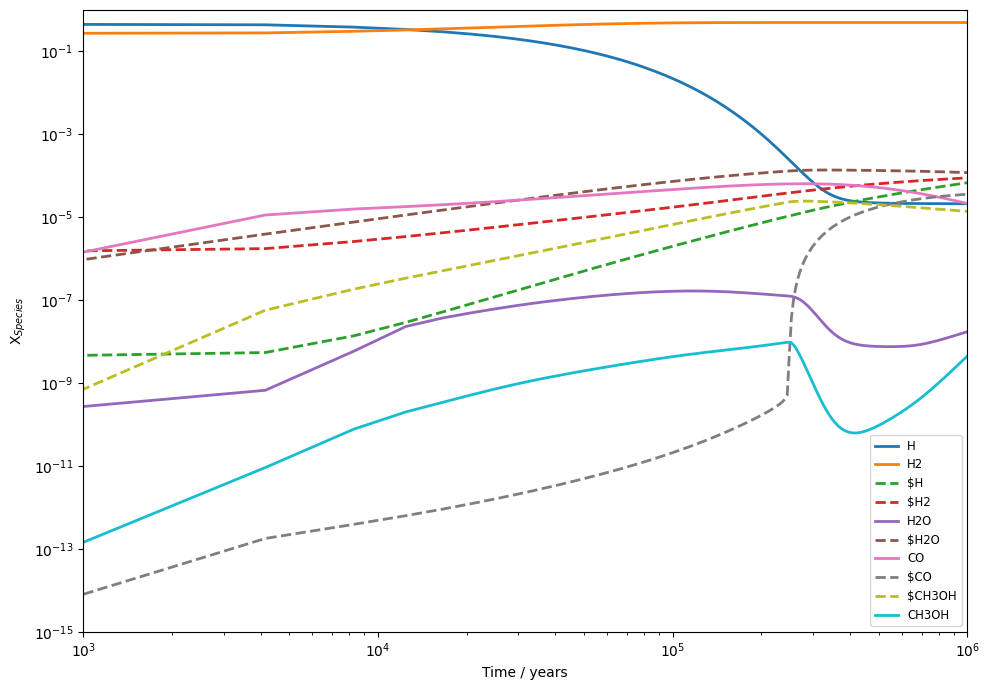

In [5]:
species = ["H", "H2", "$H", "$H2", "H2O", "$H2O", "CO", "$CO", "$CH3OH", "CH3OH"]
fig, ax = uclchem.analysis.create_abundance_plot(result_df, species, figsize=(10, 7))
ax = ax.set(xscale="log", ylim=(1e-15, 1), xlim=(1e3, 1e6))